## Install PiML and dependencies

In [ ]:
!pip install piml "pandas<=2.0" "numpy<1.24" "xgboost<1.7.3" "pygam<0.9.0"

## Setup


In [2]:
# Initializing PiML object
from piml import Experiment
exp = Experiment()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [3]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Load data

In [4]:
# Loading data
#exp.data_loader()
# or using panda to read datafile
# import pandas as pd
# data = pd.read_csv('creditdat.csv')
exp.data_loader("FairnessCreditSimu")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Mortgage,Balance,Amount Past Due,Credit Inquiry,Open Trade,Delinquency,Utilization,Gender,Race,Approved
0,240425.285772,752.469928,0.000000,0.0,1.0,1.0,0.497431,0.0,1.0,0.0
1,121696.150555,288.811255,0.000000,0.0,0.0,0.0,0.375824,0.0,1.0,1.0
2,70520.112709,2908.259451,3956.225557,4.0,0.0,3.0,0.988891,1.0,0.0,0.0
3,90541.092690,769.478436,0.000000,3.0,3.0,1.0,0.671151,0.0,1.0,0.0
4,108369.011441,723.190759,0.000000,0.0,1.0,0.0,0.049368,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,121637.682196,807.395196,0.000000,1.0,0.0,0.0,0.271246,1.0,0.0,0.0
9996,57081.887342,1119.888885,0.000000,0.0,1.0,0.0,0.098233,0.0,0.0,1.0
9997,122562.948774,607.331816,0.000000,0.0,0.0,0.0,0.049542,0.0,1.0,1.0
9998,154571.087990,451.126803,0.000000,1.0,1.0,0.0,0.540315,1.0,1.0,0.0


## Data summary and exploratory analysis

#### Exclude protected features

In [5]:
exp.data_summary(feature_exclude=['Gender', 'Race'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(10000, 10)')

In [6]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Prepare data for supervised learning

In [7]:
exp.data_prepare(target='Approved', task_type='Classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,0,1
0,Excluded columns,"[Gender, Race]"
1,Target variable,Approved
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.2
6,Random state,0


## Model training

#### train four internal piml models and an external XGB model

In [8]:
# Select EBM, XGB2, GAMI-Net, and ReLU-DNN
# For XGB2, click on the configure button; type "Mortgage", in monotonic increasing; and "Utilization", in monotonic decreasing.
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [9]:
xgbtuned = XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.3, random_state=0)
exp.model_train(model=xgbtuned, name='xgb_ext')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register xgb_ext Done</p>")

In [10]:
for mod in ['GAMI-Net', 'EBM', 'ReLU-DNN', 'XGB2','xgb_ext']:
    print(mod)
    exp.model_diagnose(model=mod, show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

GAMI-Net


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7525,0.8349,0.8106,0.7485,0.7783
Test,0.7365,0.8160,0.7935,0.7366,0.7640
Gap,-0.0160,-0.0189,-0.0171,-0.0119,-0.0143


EBM


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7619,0.8435,0.8298,0.7517,0.7888
Test,0.7340,0.8174,0.8084,0.7272,0.7656
Gap,-0.0279,-0.0261,-0.0214,-0.0245,-0.0232


ReLU-DNN


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7560,0.8373,0.8078,0.7544,0.7802
Test,0.7370,0.8180,0.7935,0.7373,0.7643
Gap,-0.0190,-0.0193,-0.0143,-0.0171,-0.0158


XGB2


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7665,0.8513,0.8270,0.7590,0.7915
Test,0.7365,0.8180,0.8028,0.7326,0.7661
Gap,-0.0300,-0.0333,-0.0242,-0.0264,-0.0254


xgb_ext


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9854,0.9993,0.9965,0.9767,0.9865
Test,0.7095,0.7842,0.7516,0.7201,0.7355
Gap,-0.2759,-0.2151,-0.2449,-0.2565,-0.2509


#### According to AUC metric (threshold independent ) 

##### GAMI-Net > FFNN > EBM > XGB2 > xgb_ext

## Model Explainability

feature imp

GAMI-NET : Dq > uti> mort >bal> inq

EBM : uti > dq > mort > amount > bal

ReLU : dq > uti > mort > bal > inq

XGB2 : amount > uti > mort > bal > dq 

xgb_ext : uti > bal > mort > amount > dq



In [11]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

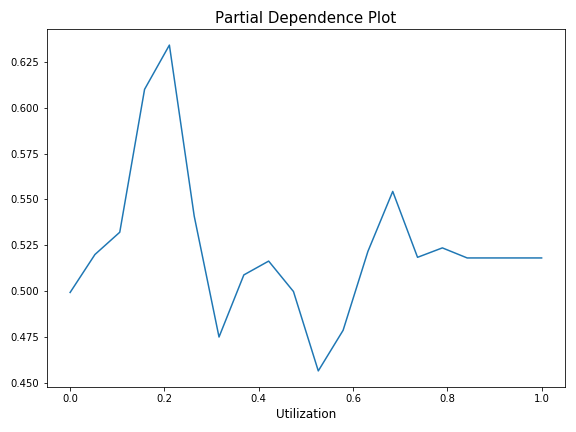

In [13]:
exp.model_explain(model='xgb_ext', show='pdp',uni_feature='Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

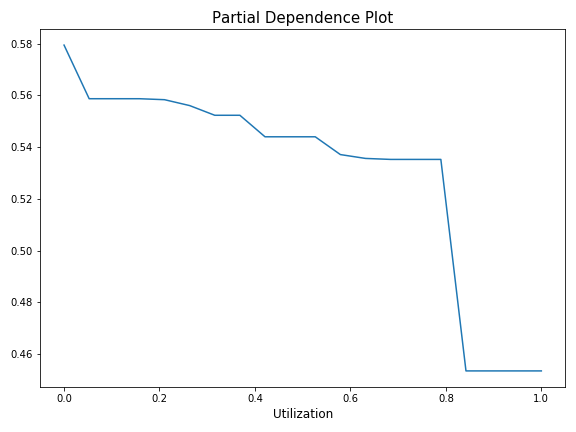

In [14]:
exp.model_explain(model='XGB2', show='pdp',uni_feature='Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

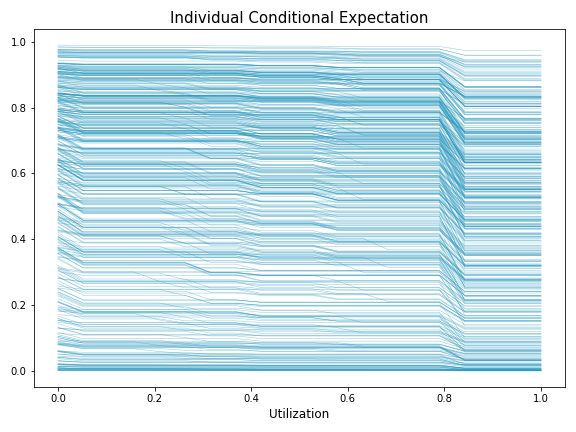

In [15]:
exp.model_explain(model='XGB2', show='ice',uni_feature='Utilization')

In [16]:
exp.model_interpret() 
## uti indeed has strong interaction with amount past due for xgb2

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [17]:
exp.model_interpret() 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

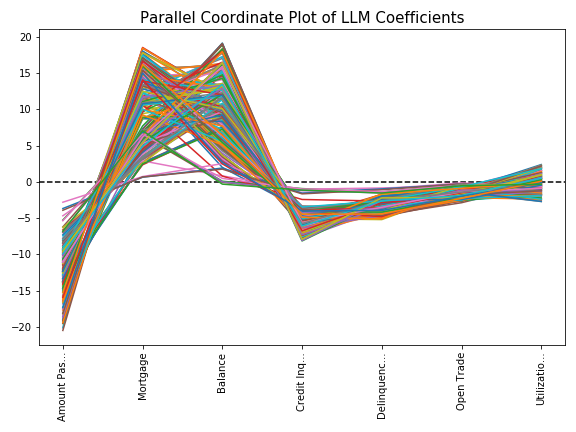

In [19]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

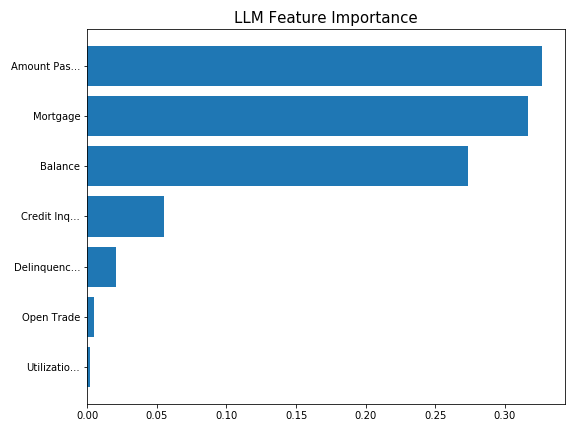

In [20]:
exp.model_interpret(model='ReLU-DNN', show='global_fi') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

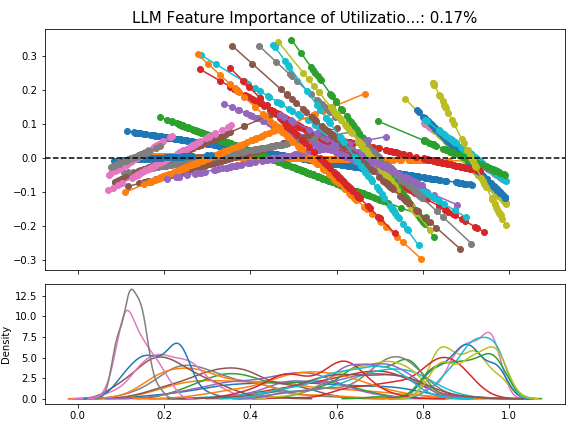

In [21]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='Utilization') 

In [22]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,797.0,0.4417,0.4969,0.6626,0.8177
1,511.0,0.3601,0.4805,0.7262,0.8174
2,362.0,0.5580,0.4973,0.6767,0.8075
3,290.0,0.3828,0.4869,0.6954,0.8135
4,217.0,0.5991,0.4912,0.6681,0.8191
...,...,...,...,...,...
949,1.0,1.0000,NaN,NaN,0.7917
950,1.0,1.0000,NaN,NaN,0.7879
951,1.0,0.0000,NaN,NaN,0.8182
952,1.0,1.0000,NaN,NaN,0.8194


In [23]:
# Model Diagnostics
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [24]:
# Model Comparison
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [25]:
exp.model_fairness()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>